In [2]:
from __future__ import print_function, division

import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read in ATLAS decorrelation methods: tau21+DDT, D2+kNN, and uBoost
outputdict=json.load(open('ATLAS_output_v2.json'))

In [4]:
outputdict['uBoost']

[[100, 18.992649597947807, 4.119768221981722],
 [100, 17.1717847505631, 8.860618004700875],
 [100, 11.318868701123066, 75.71318237399306],
 [100, 7.459216491649553, 300.5450323845898],
 [100, 4.726246010311809, 315.81620782148786],
 [100, 3.620105218123093, 231.99910292713525],
 [100, 3.2391729592158676, 640.3594938875135],
 [100, 3.5410602026222238, 179.08802260765006]]

In [71]:
import ast
uBoost_new=[]
with open('uBoost.out','r') as f:
    for line in f:
        line2=ast.literal_eval(line)
        uBoost_new.append(line2)
uBoost_new=np.array(uBoost_new)

In [88]:
list(np.unique(uBoost_new[:,1]))

[0.0, 0.01, 0.1, 0.3, 1.0, 3.0, 5.0, 10.0, 50.0, 100.0]

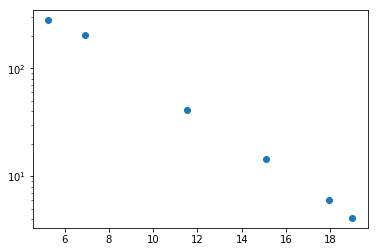

In [100]:
plt.scatter(uBoost_new[(uBoost_new[:,1]<5) & (uBoost_new[:,0]==300)][:,2],\
            uBoost_new[(uBoost_new[:,1]<5) & (uBoost_new[:,0]==300)][:,3])
plt.yscale('log')


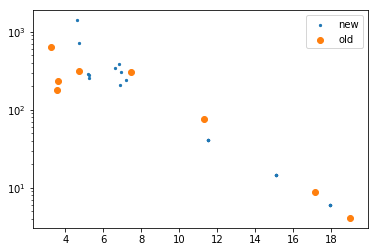

In [91]:
plt.scatter(uBoost_new[uBoost_new[:,1]<5][:,2],uBoost_new[uBoost_new[:,1]<5][:,3],s=5,label='new')
plt.scatter(np.array(outputdict['uBoost'])[:,1],np.array(outputdict['uBoost'])[:,2],label='old')
plt.yscale('log')
plt.legend()

In [16]:
import glob,csv,ast
state_dist={}
files=glob.glob('plane_Wjets_DNN_dist_v3/evaluation/loglog*')
print(files)
vallist=[]
testlist=[]
for file in files:
    with open(file,'r') as f:
        for line in f:
            line=line.split(' ')
            if(line[0]=='val'):
                vallist.append(line[2:])
            elif(line[0]=='test'):
                testlist.append(line[2:])
vallist=np.array(vallist).astype('float')
testlist=np.array(testlist).astype('float')

['plane_Wjets_DNN_dist_v3/evaluation/loglog2', 'plane_Wjets_DNN_dist_v3/evaluation/loglog3', 'plane_Wjets_DNN_dist_v3/evaluation/loglog4', 'plane_Wjets_DNN_dist_v3/evaluation/loglog1']


In [5]:
import glob,csv,ast
vallist6={}
testlist6={}
for i in range(1,7):
    files=glob.glob('results/Wjets_DNN_dist_v4/evaluation/loglog*_'+str(i))
    print(files)
    vallist6[i]=[]
    testlist6[i]=[]
    for file in files:
        with open(file,'r') as f:
            for line in f:
                line=line.split(' ')
                if(line[0]=='val'):
                    vallist6[i].append(line[2:])
                elif(line[0]=='test'):
                    testlist6[i].append(line[2:])
    vallist6[i]=np.array(vallist6[i]).astype('float')
    testlist6[i]=np.array(testlist6[i]).astype('float')

['results/Wjets_DNN_dist_v4/evaluation/loglog_eval_20_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_140_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_300_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_70_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_600_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_60_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_500_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_40_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_180_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_10_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_220_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_100_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_90_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_30_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_400_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_50_1', 'results/Wjets_DNN_dist_v4/evaluation/loglog_eval_80_1', 'results/Wjets_DNN_dis

In [10]:
discoparlist=np.unique(vallist6[1][:,1])

In [11]:
discoparlist

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 140.,
       180., 220., 260., 300., 400., 500., 600.])

In [14]:
valloss_use6={}
valloss_use6_smoothed={}
toplottry6={}
for i in range(1,7):
    for par in discoparlist:
        valloss_s=vallist6[i][vallist6[i][:,1]==par][:,3]
        valloss_b=vallist6[i][vallist6[i][:,1]==par][:,4]
        valloss_d=vallist6[i][vallist6[i][:,1]==par][:,5]
        valloss_use6[i,par]=valloss_s+valloss_b+valloss_d

stdlist={}
meanlist={}
cutlist={}
for par in discoparlist:
    print(par)
    minlisttest=[np.min(valloss_use6[i,par]) for i in range(1,7)]
    stdlist[par]=np.array([np.std(np.sort(minlisttest)[:i]) for i in range(2,len(minlisttest)+1)])
    meanlist[par]=np.array([np.mean(np.sort(minlisttest)[:i]) for i in range(2,len(minlisttest)+1)])
    threshold=10*stdlist[par][2]+meanlist[par][2]
    for i in range(1,7):
        if np.min(valloss_use6[i,par])>threshold:
            print(par,i)
            cutlist[i,par]=True
        else:
            cutlist[i,par]=False        
        
        
        
#        if len(valloss_use6[i,par])>10:
#            valloss_use6_smoothed[i,par]=np.convolve(valloss_use6[i,par], np.ones((5,))/5, mode='valid')
        
#    toplottry6[i]=np.array([[i,par,2+np.argmin(valloss_use6_smoothed[i,par])\
#        ,testlist6[i][testlist6[i][:,1]==par][2+np.argmin(valloss_use6_smoothed[i,par]),-2]\
#        ,testlist6[i][testlist6[i][:,1]==par][2+np.argmin(valloss_use6_smoothed[i,par]),-1]]


for i in range(1,7):
    toplottry6[i]=np.array([[i,par,np.argmin(valloss_use6[i,par])\
        ,testlist6[i][testlist6[i][:,1]==par][np.argmin(valloss_use6[i,par]),-2]\
        ,testlist6[i][testlist6[i][:,1]==par][np.argmin(valloss_use6[i,par]),-1]]
     for par in discoparlist if (len(valloss_use6[i,par])>10 and cutlist[i,par]==False)])


10.0
20.0
30.0
30.0 3
40.0
50.0
60.0
70.0
70.0 3
80.0
90.0
100.0
140.0
180.0
220.0
260.0
300.0
300.0 6
400.0
400.0 2
400.0 6
500.0
500.0 1
600.0


In [17]:
toplottry6_all=np.concatenate((toplottry6[1],toplottry6[2],toplottry6[3],
                               toplottry6[4],toplottry6[5],toplottry6[6]))
toplottry6_all=np.concatenate((toplottry6_all[:,1:],testlist[testlist[:,0]==0][-1][[0,1,-2,-1]].reshape((1,-1)),
                              1.01*testlist[testlist[:,0]==0][-1][[0,1,-2,-1]].reshape((1,-1))            
                              ))

In [19]:
# Source for how I draw envelope around scatter plot points:
# http://blog.thehumangeo.com/2014/05/12/drawing-boundaries-in-python/

import shapely.geometry as geometry
from descartes import PolygonPatch
from shapely.ops import cascaded_union, polygonize
from scipy.spatial import Delaunay
import numpy as np
import math

def plot_polygon(polygon):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    margin = .3
    x_min, y_min, x_max, y_max = polygon.bounds
    ax.set_xlim([x_min-margin, x_max+margin])
    ax.set_ylim([y_min-margin, y_max+margin])
    patch = PolygonPatch(polygon, fc='#999999',
                         ec='#000000', fill=True,
                         zorder=-1)
    ax.add_patch(patch)
    return fig

def alpha_shape_logy(points, alpha):
    """
    Compute the alpha shape (concave hull) of a set
    of points.
    @param points: Iterable container of points.
    @param alpha: alpha value to influence the
        gooeyness of the border. Smaller numbers
        don't fall inward as much as larger numbers.
        Too large, and you lose everything!
    """
    if len(points) < 4:
        # When you have a triangle, there is no sense
        # in computing an alpha shape.
        return geometry.MultiPoint(list(points)).convex_hull
    def add_edge(edges, edge_points, coords, i, j):
        """
        Add a line between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
                # already added
            return
        edges.add( (i, j) )
        edge_points.append(coords[ [i, j] ])
    coords = np.dstack((points[:,0],np.log(points[:,1])))[0]
    tri = Delaunay(coords)
    edges = set()
    edge_points = []
    # loop over triangles:
    # ia, ib, ic = indices of corner points of the
    # triangle
    for ia, ib, ic in tri.vertices:
        pa = coords[ia]
        pb = coords[ib]
        pc = coords[ic]
        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)
        # Semiperimeter of triangle
        s = (a + b + c)/2.0
        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))
        circum_r = a*b*c/(4.0*area)
        # Here's the radius filter.
        #print circum_r
        if circum_r < 1.0/alpha:
            add_edge(edges, edge_points, points, ia, ib)
            add_edge(edges, edge_points, points, ib, ic)
            add_edge(edges, edge_points, points, ic, ia)
    m = geometry.MultiLineString(edge_points)
    triangles = list(polygonize(m))
    return cascaded_union(triangles), edge_points


In [22]:
points=toplottry6_all[:,[-2,-1]]
points=points[points[:,0]>3] # cut out left most point as that creates a misleadingly sharp looking uncertainty region at low R50



In [23]:
import glob,csv,ast
state_dist={}
#files=glob.glob('plane_Wjets_CNN_dist_v2/evaluation/loglog*')
files=glob.glob('plane_Wjets_CNN_dist_v3/evaluation/loglog*')
print(files)
vallist_CNN=[]
testlist_CNN=[]
for file in files:
    with open(file,'r') as f:
        for line in f:
            line=line.split(' ')
            if(line[0]=='val'):
                vallist_CNN.append(line[2:])
            elif(line[0]=='test'):
                testlist_CNN.append(line[2:])
vallist_CNN=np.array(vallist_CNN).astype('float')
testlist_CNN=np.array(testlist_CNN).astype('float')

['plane_Wjets_CNN_dist_v3/evaluation/loglog2', 'plane_Wjets_CNN_dist_v3/evaluation/loglog3', 'plane_Wjets_CNN_dist_v3/evaluation/loglog1']


In [24]:
import glob,csv,ast
vallist6_CNN={}
testlist6_CNN={}
for i in range(1,7):
    files=glob.glob('results/Wjets_CNN_dist_v4/evaluation/loglog*_'+str(i))
    print(files)
    vallist6_CNN[i]=[]
    testlist6_CNN[i]=[]
    for file in files:
        with open(file,'r') as f:
            for line in f:
                line=line.split(' ')
                if(line[0]=='val'):
                    vallist6_CNN[i].append(line[2:])
                elif(line[0]=='test'):
                    testlist6_CNN[i].append(line[2:])
    vallist6_CNN[i]=np.array(vallist6_CNN[i]).astype('float')
    testlist6_CNN[i]=np.array(testlist6_CNN[i]).astype('float')

['results/Wjets_CNN_dist_v4/evaluation/loglog_eval_150_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_18_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_38_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_46_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_100_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_34_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_30_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_42_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_250_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_200_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_50_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_6_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_24_1', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_12_1']
['results/Wjets_CNN_dist_v4/evaluation/loglog_eval_46_2', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_42_2', 'results/Wjets_CNN_dist_v4/evaluation/loglog_eval_24_2', 'results/Wjets_CNN_dist_v4

In [25]:
discoparlist_CNN=np.unique(vallist_CNN[:,0])
discoparlist_CNN

array([  0.,   6.,  12.,  18.,  24.,  30.,  34.,  38.,  42.,  46.,  50.,
       100., 150., 200., 250.])

In [27]:
valloss_use6_CNN={}
#valloss_use6_smoothed={}
toplottry6_CNN={}
for i in range(1,7):
    for par in discoparlist_CNN:
        valloss_s=vallist6_CNN[i][vallist6_CNN[i][:,1]==par][:,3]
        valloss_b=vallist6_CNN[i][vallist6_CNN[i][:,1]==par][:,4]
        valloss_d=vallist6_CNN[i][vallist6_CNN[i][:,1]==par][:,5]
        valloss_use6_CNN[i,par]=valloss_s+valloss_b+valloss_d

stdlist={}
meanlist={}
cutlist={}
for par in discoparlist_CNN:
    print(par)
    minlisttest=[np.min(valloss_use6_CNN[i,par]) for i in range(1,7) if len(valloss_use6_CNN[i,par])>10]
    for i in range(1,7):
        cutlist[i,par]=True
    if(len(minlisttest)>3):
        stdlist[par]=np.array([np.std(np.sort(minlisttest)[:i]) for i in range(2,len(minlisttest)+1)])
        meanlist[par]=np.array([np.mean(np.sort(minlisttest)[:i]) for i in range(2,len(minlisttest)+1)])
        threshold=5*stdlist[par][2]+meanlist[par][2]
        for i in range(1,7):
            if len(valloss_use6_CNN[i,par])>10 and np.min(valloss_use6_CNN[i,par])<threshold:
                cutlist[i,par]=False        
            else:
                print("bad run ",par,i)



for i in range(1,7):
    toplottry6_CNN[i]=np.array([[i,par,np.argmin(valloss_use6_CNN[i,par])\
        ,testlist6_CNN[i][testlist6_CNN[i][:,1]==par][np.argmin(valloss_use6_CNN[i,par]),-2]\
        ,testlist6_CNN[i][testlist6_CNN[i][:,1]==par][np.argmin(valloss_use6_CNN[i,par]),-1]]
     for par in discoparlist_CNN if (len(valloss_use6_CNN[i,par])>10 and cutlist[i,par]==False)])


0.0
6.0
12.0
18.0
24.0
30.0
34.0
38.0
42.0
46.0
50.0
bad run  50.0 3
100.0
bad run  100.0 3
150.0
bad run  150.0 2
200.0
bad run  200.0 3
bad run  200.0 6
250.0


In [53]:
toplottry6_CNN_all=np.concatenate((toplottry6_CNN[1],toplottry6_CNN[2],toplottry6_CNN[3],
                               toplottry6_CNN[4],toplottry6_CNN[5],toplottry6_CNN[6]))

CNNpoint=np.argmax(testlist_CNN[(testlist_CNN[:,0]==0.)][:,-2])


toplottry6_CNN_all=np.concatenate((toplottry6_CNN_all[:,1:],
                                   testlist_CNN[testlist_CNN[:,0]==0][CNNpoint][[0,1,-2,-1]].reshape((1,-1)),
                                   1.01*testlist_CNN[testlist_CNN[:,0]==0][CNNpoint][[0,1,-2,-1]].reshape((1,-1))
                                 ))

points_CNN=toplottry6_CNN_all[:,[-2,-1]]
points_CNN=points_CNN[points_CNN[:,0]>3]
#points_CNN=np.dstack((points_CNN[:,0],np.log(points_CNN[:,1])))[0]
#points_CNN=np.concatenate((points_CNN,np.array([[13.,100.],[13.,110.],[14.,70.],[14.,80.]])))




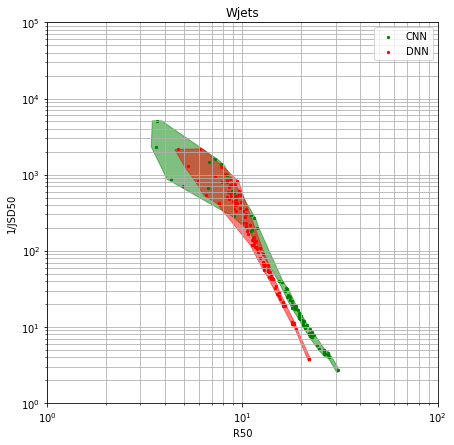

In [54]:
from matplotlib.collections import LineCollection
plt.figure(figsize=(7,7)) 
concave_hull_CNN, edge_points_CNN = alpha_shape_logy(points_CNN,alpha=0.08)
#_ = plot_polygon(concave_hull)
patch_CNN = PolygonPatch(concave_hull_CNN.buffer(0.2), fc='green',
                         ec='green', fill=True,
                         zorder=-1,alpha=0.5)
plt.gca().add_patch(patch_CNN)
plt.scatter(points_CNN[:,0], points_CNN[:,1],s=5,color='green',label='CNN')
concave_hull, edge_points = alpha_shape_logy(points,alpha=0.08)
patch = PolygonPatch(concave_hull.buffer(0.2), fc='red',
                         ec='red', fill=True,
                         zorder=-1,alpha=0.5)
plt.gca().add_patch(patch)
plt.scatter(points[:,0], points[:,1],s=5,color='r',label='DNN')

#plt.scatter(gregorpoints[:,1],gregorpoints[:,2],label='CNN adv')


#plt.scatter(vallist[vallist[:,1]>50][:,-2],vallist[vallist[:,1]>50][:,-1],s=1,label='val')
#plt.scatter(testlist[testlist[:,1]>50][:,-2],testlist[testlist[:,1]>50][:,-1],s=1,label='test')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('R50')
plt.ylabel('1/JSD50')
plt.title('Wjets')
plt.xlim(1,100)
plt.ylim(1,100000)
plt.grid(b=True,which='both')
plt.legend()


In [32]:
#adversary=np.array([
#[8.844853607002717, 420.8873012065613],
#[9.32919452403693, 330.2296799050306],
#[9.626478318002627, 350.9210582127037],
#[10.856984068173398, 190.48841910437721],
#[12.908810572687225, 92.62551195363297],
#[16.352120535714285, 20.88473011846998],
#[21.218682114409848, 3.6750258876927324]])

adversary=np.array([
    [21.877486077963404, 3.60308677399872],
  [17.318548840556893, 21.270826229067804],
 [14.149989892864362, 52.196972051459326],
 [10.014827146684702, 170.14777111245198],
 [8.197070345767331, 258.5734421889317],
 [8.140395390633259, 360.5116084345299]
])

In [33]:
#CNNadversary=np.array([[29.30188679245283, 2.6628074280714755],
# [23.490756302521007, 8.565238882442024],
# [16.9623786407767, 40.40437543972767],
#[13.669437652811736, 167.9435401783712],
# [12.99581589958159, 159.05534843030844],
# [12.007731958762887, 229.2149880257887],
# [10.966653589642997, 307.82019932987674]]
#)
CNNadversary=np.array([[29.579644475426978, 2.912924238679124],[24.63555139825178, 7.825780412021321],
[17.230491573984253, 42.41332518194903],
[13.787068125203076, 205.80890960906024],
[11.367067508036671, 255.0033026363734],
[9.509281739065477, 662.8442832473979],
[8.975568482284505, 1390.0030929325326]]
                        )



In [34]:
minR50=np.min(vallist[:,-2])
maxR50=np.max(vallist[:,-2])
nR50bins=8
R50binwidth=(maxR50-minR50)/nR50bins
print(minR50,maxR50)

1.1542214776133497 21.88764343039066


In [35]:
minR50_CNN=np.min(vallist_CNN[:,-2])
maxR50_CNN=np.max(vallist_CNN[:,-2])
nR50bins_CNN=20
R50binwidth_CNN=(maxR50_CNN-minR50_CNN)/nR50bins_CNN
print(minR50_CNN,maxR50_CNN)

1.428021238570421 29.474812433011788


In [36]:
# ADDING CODE FOR PLANING POINTS DS
import glob,csv,ast
state_dist={}
files=glob.glob('plane_Wjets_DNN_plane/evaluation/loglog*')
print(files)
vallist_plane=[]
testlist_plane=[]
for file in files:
    with open(file,'r') as f:
        for line in f:
            line=line.split(' ')
            if(line[0]=='val'):
                vallist_plane.append(line[2:])
            elif(line[0]=='test'):
                testlist_plane.append(line[2:])
vallist_plane=np.array(vallist_plane).astype('float')
testlist_plane=np.array(testlist_plane).astype('float')

import glob,csv,ast
state_dist={}
files=glob.glob('plane_Wjets_CNN_plane/evaluation/loglog*')
print(files)
vallist_plane_CNN=[]
testlist_plane_CNN=[]
for file in files:
    with open(file,'r') as f:
        for line in f:
            line=line.split(' ')
            if(line[0]=='val'):
                vallist_plane_CNN.append(line[2:])
            elif(line[0]=='test'):
                testlist_plane_CNN.append(line[2:])
vallist_plane_CNN=np.array(vallist_plane_CNN).astype('float')
testlist_plane_CNN=np.array(testlist_plane_CNN).astype('float')

['plane_Wjets_DNN_plane/evaluation/loglog_Wjets_DNN_plane']
['plane_Wjets_CNN_plane/evaluation/loglog_Wjets_CNN_plane']


In [25]:
# GREGOR: YOU WANT TO ADD THESE LINES TO THE MONEYPLOT AND UPDATE THE LEGEND:
# plt.scatter([testlist_plane[np.argmax(vallist_plane[:,-1]),-2]],
#        [testlist_plane[np.argmax(vallist_plane[:,-1]),-1]],s=50)
# plt.scatter([testlist_plane_CNN[np.argmax(vallist_plane_CNN[:,-1]),-2]],
#        [testlist_plane_CNN[np.argmax(vallist_plane_CNN[:,-1]),-1]],s=50)


In [62]:
[uBpoint[1] for uBpoint in np.array(outputdict['uBoost'])]

[18.992649597947807,
 17.1717847505631,
 11.318868701123066,
 7.459216491649553,
 4.726246010311809,
 3.620105218123093,
 3.2391729592158676,
 3.5410602026222238]

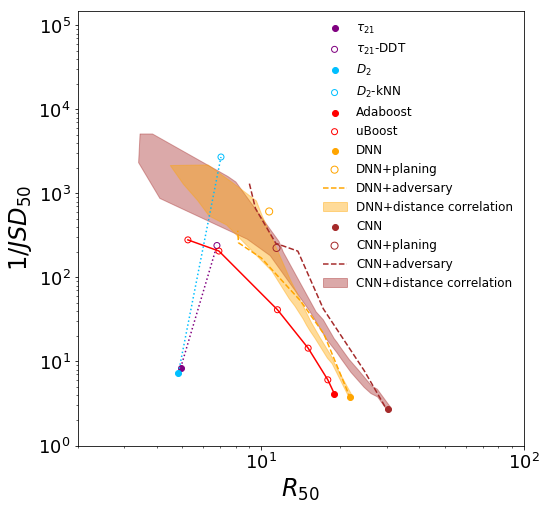

In [102]:
plt.figure(figsize=(8,8)) 

tau21plot=plt.scatter(outputdict['tau21'][0],outputdict['tau21'][1],label='tau21',color='purple')
tau21DDTplot=plt.scatter(outputdict['tau21DDT'][0],outputdict['tau21DDT'][1],label='tau21DDT',color='purple',facecolors='none')
plt.plot([outputdict['tau21'][0],outputdict['tau21DDT'][0]],[outputdict['tau21'][1],outputdict['tau21DDT'][1]],color='purple',linestyle='dotted')

D2plot=plt.scatter(outputdict['D2'][0],outputdict['D2'][1],label='D2',color='deepskyblue')
D2kNNplot=plt.scatter(outputdict['D2kNN'][0],outputdict['D2kNN'][1],label='D2kNN',color='deepskyblue',facecolors='none')
plt.plot([outputdict['D2'][0],outputdict['D2kNN'][0]],[outputdict['D2'][1],outputdict['D2kNN'][1]],color='deepskyblue',linestyle='dotted')
               
BDTtoplotx=uBoost_new[(uBoost_new[:,1]<5) & (uBoost_new[:,0]==300)][:,2]
BDTtoploty=uBoost_new[(uBoost_new[:,1]<5) & (uBoost_new[:,0]==300)][:,3]
#BDTtoplotx=np.array([uBpoint[1] for uBpoint in np.array(outputdict['uBoost'][:-1])])
#BDTtoploty=np.array([uBpoint[2] for uBpoint in np.array(outputdict['uBoost'][:-1])])
adaboostplotx=BDTtoplotx[:1]
adaboostploty=BDTtoploty[:1]
uBoostplotx=BDTtoplotx[1:]
uBoostploty=BDTtoploty[1:]
uBoostplot, =plt.plot(BDTtoplotx,BDTtoploty,color='red',label='uBoost')
uBoostplot2 =plt.scatter(uBoostplotx,uBoostploty,color='red',facecolors='none',label='uBoost')
adaboostplot =plt.scatter(adaboostplotx,adaboostploty,label='Adaboost',color='red')


DNNpoint=testlist[(testlist[:,0]==0.)&(testlist[:,1]==199)]
DNNplot = plt.scatter(DNNpoint[0,-2],DNNpoint[0,-1],label='DNN',color='orange')
DNNadvplot, = plt.plot(adversary[:,0],adversary[:,1],label='DNN+adversary',color='orange',linestyle='dashed')

CNNpoint=np.argmax(testlist_CNN[(testlist_CNN[:,0]==0.)][:,-2])
CNNpoint=np.array([(testlist_CNN[(testlist_CNN[:,0]==0.)])[CNNpoint]])
#CNNpoint=testlist_CNN[(testlist_CNN[:,0]==0.)&(testlist_CNN[:,1]==99)]
CNNplot = plt.scatter(CNNpoint[0,-2],CNNpoint[0,-1],label='CNN',color='brown')
CNNadvplot, = plt.plot(CNNadversary[:,0],CNNadversary[:,1],label='CNN+adversary',color='brown',linestyle='dashed')


DNNplaneplot=plt.scatter([testlist_plane[np.argmax(vallist_plane[:,-1]),-2]],
        [testlist_plane[np.argmax(vallist_plane[:,-1]),-1]],s=50,facecolor='none',color='orange')
CNNplaneplot=plt.scatter([testlist_plane_CNN[np.argmax(vallist_plane_CNN[:,-1]),-2]],
                    [testlist_plane_CNN[np.argmax(vallist_plane_CNN[:,-1]),-1]],s=50,facecolor='none',color='brown')


concave_hull_CNN, edge_points_CNN = alpha_shape_logy(points_CNN,alpha=0.08)
#_ = plot_polygon(concave_hull)
patch_CNN = PolygonPatch(concave_hull_CNN.buffer(0.2), fc='brown',
                         ec='brown', fill=True,
                         zorder=-1,alpha=0.4,label='CNN+distance correlation')
plt.gca().add_patch(patch_CNN)
concave_hull, edge_points = alpha_shape_logy(points,alpha=0.08)
patch = PolygonPatch(concave_hull.buffer(0.2), fc='orange',
                         ec='orange', fill=True,
                         zorder=-1,alpha=0.4,label='DNN+distance correlation')
plt.gca().add_patch(patch)

plt.xscale('log')
plt.yscale('log')
plt.xlim(2,100)
plt.ylim(1,150000)
#plt.grid(b=True,which='both')
plt.xlabel('$R_{50}$', fontsize=24)
plt.ylabel('$1/JSD_{50}$', fontsize=24)
plt.legend([tau21plot,tau21DDTplot,D2plot,D2kNNplot,adaboostplot,uBoostplot2,DNNplot,DNNplaneplot,DNNadvplot,patch,CNNplot,CNNplaneplot,CNNadvplot,patch_CNN], #,,CNNdistplot],
           [r'$\tau_{21}$',r'$\tau_{21}$-DDT',"$D_2$","$D_2$-kNN","Adaboost","uBoost","DNN","DNN+planing","DNN+adversary","DNN+distance correlation","CNN","CNN+planing","CNN+adversary","CNN+distance correlation"] #,,"CNN+distance correlation"]
           ,fontsize=12,frameon=False)

        
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.savefig('money_plot.pdf')



# plot average images

In [37]:
files = np.load("Data/W_CNN_v1.npz")
train = files["train"]
val = files["val"]
test = files["test"]

In [38]:
y_train = train[:,330]
m_train = train[:,331]
m_train = m_train*250+50
pt_train = train[:,332]
train=train[:,:330]

y_val = val[:,330]
y_test = test[:,330]



In [28]:
img_rows=40
img_cols=40
ncolors=1
def expand_array(image):

    image = image.reshape(110,3)
    
    expandedimage=np.zeros((img_rows,img_cols,ncolors),dtype='float32')

    expandedimage[image[:,0].astype('int'),image[:,1].astype('int')]=image[:,2].reshape((-1,ncolors))
    expandedimage=np.transpose(expandedimage,(2,0,1))


    return expandedimage


In [143]:
#len(train[y_train==1])
train_W.shape

NameError: name 'train_W' is not defined

In [29]:
train_W=np.array([expand_array(im) for im in train[y_train==0][:100000]])
train_qcd=np.array([expand_array(im) for im in train[y_train==1][:100000]])


In [39]:
len(train[y_train==1]),len(val[y_val==1]),len(test[y_test==1])

(110000, 330000, 770000)

In [40]:
len(train[y_train==0]),len(val[y_val==0]),len(test[y_test==0])

(250000, 80000, 80000)

Text(0.5, 1.0, 'QCD jets')

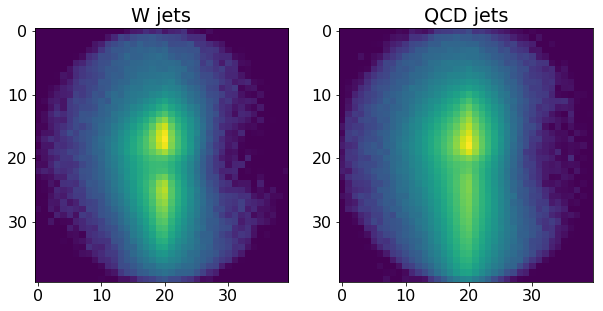

In [32]:
import matplotlib

matplotlib.rcParams.update({'font.size': 16})


fig=plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)


a=fig.add_subplot(1, 2,1)
a.imshow(np.log(1e-4+np.mean(train_W,axis=0).reshape((40,40))))
a.set_title('W jets')
a=fig.add_subplot(1, 2,2)
a.imshow(np.log(1e-4+np.mean(train_qcd,axis=0).reshape((40,40))))
a.set_title('QCD jets')




In [33]:
fig.savefig('avgimages_Wtagging.pdf',bbox_inches='tight')


# plot pt and mass for all jets

In [59]:
files = np.load("/Users/gregor/Desktop/W_FCN_v0.npz")
train = files["train"]


In [60]:
train.shape

(360000, 12)

In [61]:
50+250*np.max(train[:,0])

269.476

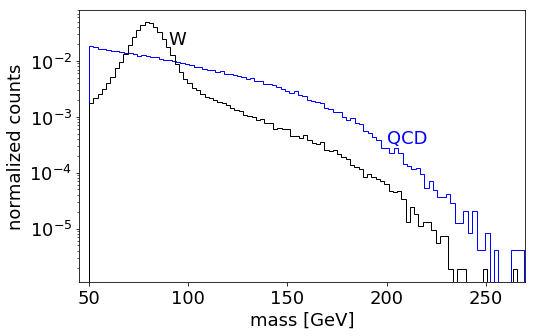

In [137]:
fig=plt.figure(figsize=(8,5))
_,_,_=plt.hist(50+250*train[:,0][train[:,-1]==1],bins=100,normed=True,histtype='step',label='QCD',color='blue')
_,_,_=plt.hist(50+250*train[:,0][train[:,-1]==0],bins=100,normed=True,histtype='step',label='W',color='black')
plt.xlabel('mass [GeV]',fontsize=18)
plt.ylabel('normalized counts',fontsize=18)
plt.yscale('log')
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.xlim(45,270)
plt.text(200,0.00033,"QCD",fontsize=18,color='blue')
plt.text(90,0.02,"W",fontsize=18,color='black')
fig.savefig('mass.pdf',bbox_inches='tight')


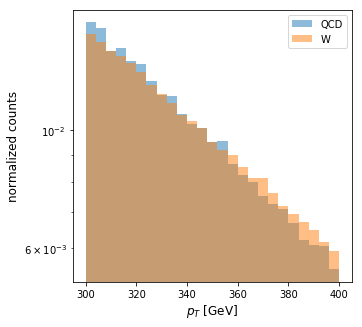

In [129]:
fig=plt.figure(figsize=(5,5))
_,_,_=plt.hist(train[:,1][train[:,-1]==1],bins=25,normed=True,alpha=0.5,label='QCD')
_,_,_=plt.hist(train[:,1][train[:,-1]==0],bins=25,normed=True,alpha=0.5,label='W')
plt.xlabel('$pT$ [GeV]',fontsize=12)
plt.ylabel('normalized counts',fontsize=12)
plt.yscale('log')
plt.legend()
fig.savefig('pT.pdf',bbox_inches='tight')


# plot mass before and after cut on classifier

In [64]:
besttest

array([[3.00000000e+02, 1.27000000e+02, 1.15360346e+00, 1.14505618e-01,
        3.60410962e+00, 7.96281336e+03],
       [3.00000000e+02, 1.34000000e+02, 1.16093214e+00, 1.07987177e-01,
        3.86048121e+00, 3.56113324e+03],
       [1.00000000e+02, 7.00000000e+01, 9.63494560e-01, 3.48659169e-02,
        8.07432574e+00, 1.55355094e+03],
       [1.00000000e+02, 1.23000000e+02, 9.49454058e-01, 3.45305260e-02,
        9.31368991e+00, 1.56606958e+03],
       [3.00000000e+01, 1.70000000e+02, 8.64042607e-01, 1.66366982e-02,
        1.14433480e+01, 1.31651180e+02],
       [2.00000000e+01, 1.37000000e+02, 8.19726789e-01, 2.20717787e-02,
        1.43194540e+01, 2.87799671e+01],
       [1.00000000e+01, 1.91000000e+02, 7.86610434e-01, 1.66239372e-02,
        1.69670795e+01, 1.47594325e+01],
       [0.00000000e+00, 1.72000000e+02, 7.18872117e-01, 0.00000000e+00,
        2.19956009e+01, 3.86044409e+00]])

In [65]:
besttest[3]

array([1.00000000e+02, 1.23000000e+02, 9.49454058e-01, 3.45305260e-02,
       9.31368991e+00, 1.56606958e+03])

In [66]:
adversary

array([[ 21.87748608,   3.60308677],
       [ 17.31854884,  21.27082623],
       [ 14.14998989,  52.19697205],
       [ 10.01482715, 170.14777111],
       [  8.19707035, 258.57344219],
       [  8.14039539, 360.51160843]])

In [67]:
besttest_CNN

array([[2.50000000e+02, 5.20000000e+01, 1.31737002e+00, 2.47365007e-01,
        2.66757202e+00, 4.37728822e+03],
       [1.50000000e+02, 6.50000000e+01, 1.09177131e+00, 1.88544801e-01,
        3.55753504e+00, 7.78045436e+03],
       [1.50000000e+02, 7.40000000e+01, 1.17219425e+00, 1.57685682e-01,
        5.12994757e+00, 6.24370944e+03],
       [1.50000000e+02, 9.90000000e+01, 1.14517124e+00, 1.51660252e-01,
        6.37169313e+00, 5.99057431e+03],
       [1.00000000e+02, 8.50000000e+01, 1.04737528e+00, 1.13770149e-01,
        8.26233449e+00, 2.67959978e+03],
       [5.00000000e+01, 7.60000000e+01, 7.88593860e-01, 6.19944655e-02,
        9.19534739e+00, 7.15200632e+02],
       [4.20000000e+01, 8.30000000e+01, 8.29792178e-01, 4.86843118e-02,
        1.03933267e+01, 4.63850438e+02],
       [3.80000000e+01, 9.50000000e+01, 7.56072881e-01, 4.70515098e-02,
        1.13912066e+01, 3.01600993e+02],
       [2.40000000e+01, 6.40000000e+01, 6.20849635e-01, 3.27703076e-02,
        1.27272727e+01, 

In [69]:
Wout=np.loadtxt('Wout_Wjets_DNN_100.0_123.csv',delimiter=',')
qcdout=np.loadtxt('qcdout_Wjets_DNN_100.0_123.csv',delimiter=',')
qcdmass=np.loadtxt('qcdmass_Wjets_DNN_100.0_123.csv',delimiter=',')

In [70]:
cutval=np.percentile(Wout,50)

In [71]:
len(qcdout)/len(qcdout[qcdout>cutval])

9.31357726035682

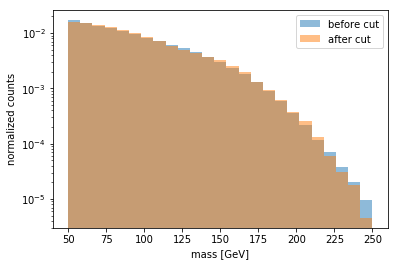

In [75]:
fig=plt.figure()
plt.hist(qcdmass,bins=25,range=[50,250],normed=True,alpha=0.5,label='before cut')
plt.hist(qcdmass[qcdout>cutval],bins=25,range=[50,250],normed=True,alpha=0.5,label='after cut')
plt.xlabel('mass [GeV]')
plt.ylabel('normalized counts')
plt.legend()
plt.yscale('log')
fig.savefig('mass_comparison_DNN+DisCo.pdf',bbox_inches='tight')


In [144]:
Wout_CNN=np.loadtxt('Wout_Wjets_CNN_50.0_76.csv',delimiter=',')
qcdout_CNN=np.loadtxt('qcdout_Wjets_CNN_50.0_76.csv',delimiter=',')
qcdmass_CNN=np.loadtxt('qcdmass_Wjets_CNN_50.0_76.csv',delimiter=',')


Wout_CNN_0=np.loadtxt('Wout_Wjets_CNN_0.0_99.csv',delimiter=',')
qcdout_CNN_0=np.loadtxt('qcdout_Wjets_CNN_0.0_99.csv',delimiter=',')
qcdmass_CNN_0=np.loadtxt('qcdmass_Wjets_CNN_0.0_99.csv',delimiter=',')

In [145]:
cutval_CNN=np.percentile(Wout_CNN,50)
cutval_CNN_0=np.percentile(Wout_CNN_0,50)

In [78]:
len(qcdout_CNN)/len(qcdout_CNN[qcdout_CNN>cutval_CNN])

9.195347393059304

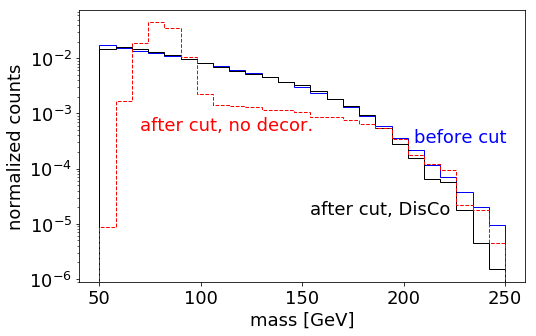

In [154]:
fig=plt.figure(figsize=(8,5))
plt.hist(qcdmass_CNN,bins=25,range=[50,250],normed=True,histtype='step',label='before cut',color='blue')
plt.hist(qcdmass_CNN[qcdout_CNN>cutval_CNN],bins=25,range=[50,250],normed=True,histtype='step',label='after cut',color='black')
plt.hist(qcdmass_CNN_0[qcdout_CNN_0>cutval_CNN_0],bins=25,range=[50,250],normed=True,histtype='step',label='after cut',color='red',linestyle='dashed')
plt.xlabel('mass [GeV]',fontsize=18)
plt.ylabel('normalized counts',fontsize=18)
#plt.legend(frameon=False,fontsize=12)
plt.text(205,0.0003,"before cut",fontsize=18,color='blue')
plt.text(70,0.0005,"after cut, no decor.",fontsize=18,color='red')
plt.text(154,0.000015,"after cut, DisCo",fontsize=18,color='black')
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.yscale('log')
fig.savefig('mass_comparison_CNN+DisCo.pdf',bbox_inches='tight')
